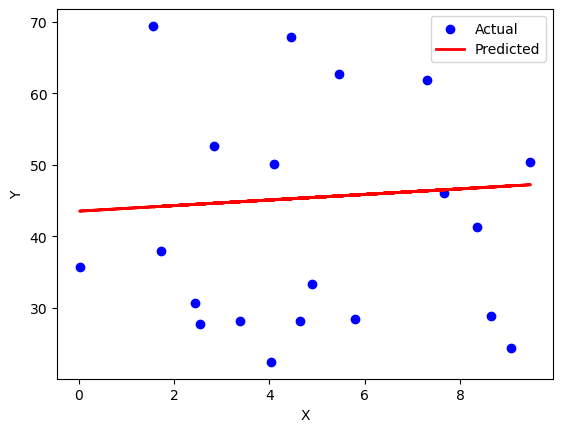

R-squared: -0.0809


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
data = {
    'X': np.random.rand(100) * 10,  
    'Y': np.random.rand(100) * 50 + 20 
}
df = pd.DataFrame(data)
X = df[['X']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(f'R-squared: {r2:.4f}')